In [42]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from datetime import datetime

In [80]:
initial = pd.read_csv('C:/users/rusty/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [81]:
ps = initial[["Date", "File", "Post patch?", "Post patch pipette R", "PCR cycles", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["PCR cycles"] == 21]
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps = ps[ps[">400"] < 8000]
ps = ps[ps['Time spent extracting cytosol'] <= 10]
ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,Date,File,Post patch?,Post patch pipette R,PCR cycles,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
4968,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02.01,Outside-Out,NaN,21.0,1.800000,4.333333,8.0,fail
4969,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02.02,Outside-Out,NaN,21.0,1.666667,6.566667,461.0,pass
4970,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.01,No-Seal,NaN,21.0,1.433333,8.033333,1.0,fail
4971,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.02,Nucleated,NaN,21.0,2.350000,7.416667,979.0,pass
4972,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.03,Outside-Out,NaN,21.0,2.216667,4.166667,456.0,pass


In [82]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 4968 to 7596
Data columns (total 9 columns):
Date                             1779 non-null datetime64[ns]
File                             1779 non-null object
Post patch?                      1779 non-null category
Post patch pipette R             238 non-null float64
PCR cycles                       1779 non-null float64
Time spent extracting cytosol    1779 non-null float64
patch duration                   1778 non-null float64
>400                             1779 non-null float64
SM_QC_PF                         1779 non-null category
dtypes: category(2), datetime64[ns](1), float64(5), object(1)
memory usage: 114.8+ KB


In [83]:
ps["Post patch?"].value_counts()

Nucleated             713
No-Seal               530
Partial-Nucleus       193
nucleus_present       124
nucleus_absent         99
Outside-Out            91
Entire-Cell            14
no_nucleus_visible      6
entire_cell             5
nucleus_visible         4
outside-out             0
nucelated               0
nr                      0
no-seal                 0
no -seal                0
Name: Post patch?, dtype: int64

# 4/20/2017 was first day of 21 PCR cycles.  Should be using PCR cycles column to do this filtering 

In [73]:
#ps = ps[ps["Date"] >= "2017-04-20"]
#ps.head()
#ps["Post patch?"].value_counts()

In [74]:
#ps["Time spent extracting cytosol"].sort_values()

In [75]:
#ps["Time spent extracting cytosol"].value_counts()

# Plot of >400bp concentration vs extraction time by post patch outcomes

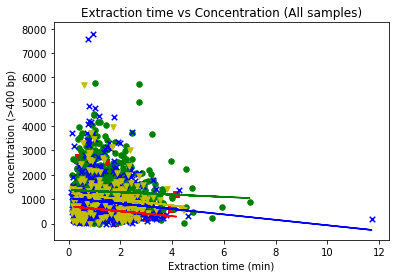

In [76]:
mask1 = ps["Post patch?"] == "Outside-Out"
mask2 = ps["Post patch?"] == "Nucleated"
mask3 = ps["Post patch?"] == "No-Seal"
mask4 = ps["Post patch?"] == "Partial-Nucleus"
mask5 = ps["Post patch?"] == "Entire-Cell"
oo = ps[mask1]
nu = ps[mask2]
ns = ps[mask3]
pn = ps[mask4]
ec = ps[mask5]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m):
    plt.scatter(x,y,s=30,c=c,marker=m)

make_plots(x1,y1,"r","s")
make_plots(x2,y2,"g","o")
make_plots(x3,y3,"b","x")
make_plots(x4,y4,"y","v")

plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)
    
fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")

# Filtering down to SMQC passing samples only

In [77]:
ps_pass = ps[ps["SM_QC_PF"] == "pass"]
ps_pass.head()

,Date,File,Post patch?,Post patch pipette R,PCR cycles,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
4969,2017-04-19,Sst-IRES-Cre;Ai14-313562.03.02.02,Outside-Out,NaN,21.0,1.666667,6.566667,461.0,pass
4971,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.02,Nucleated,NaN,21.0,2.350000,7.416667,979.0,pass
4972,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.03,Outside-Out,NaN,21.0,2.216667,4.166667,456.0,pass
4973,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.04,Nucleated,NaN,21.0,2.183333,9.466667,1193.0,pass
4974,2017-04-19,Sst-IRES-Cre;Ai14-313562.04.02.05,No-Seal,NaN,21.0,1.883333,6.700000,1319.0,pass


# Plot of >400bp concentration vs extraction time by post patch outcomes - SMQC passing samples only

In [84]:
def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

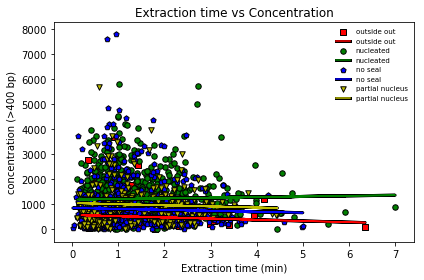

In [85]:
oo = outside_out(ps)
nu = nucleated(ps)
ns = no_seal(ps)
pn = partial_nucleated(ps)
ec = entire_cell(ps)

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

fig,ax = plt.subplots(1)

plt.title('Extraction time vs Concentration')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def make_plots(x,y,c,m,l,n):
    ax.scatter(x,y,s=30,c=c,marker=m, edgecolor='black', label=l)
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    ax.plot(x,p(x),c=c,label=l,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
    #plt.setp(lines, linewidth=3, mec='black')

make_plots(x1,y1,"r","s","outside out","outside out fit")
make_plots(x2,y2,"g","o","nucleated","nucleated fit")
make_plots(x3,y3,"b","p","no seal","no seal fit")
make_plots(x4,y4,"y","v","partial nucleus","partial nucleus fit")    

handles,labels = ax.get_legend_handles_labels()

handles = [handles[4],handles[0],handles[5],handles[1],handles[6],handles[2],handles[7],handles[3]]
labels = [labels[4],labels[0],labels[5],labels[1],labels[6],labels[2],labels[7],labels[3]]

ax.legend(handles,labels,scatterpoints=1,loc='upper right',ncol=1,fontsize=7,frameon=False)
plt.tight_layout()
plt.savefig('extraction_vs_conc.png',dpi=300)

# Putting extraction times into 1 minute time bins 

In [9]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int)
ps.info()
#ps["cytosol extraction time bins"].sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 4737 to 6351
Data columns (total 8 columns):
Date                             1019 non-null datetime64[ns]
File                             1019 non-null object
Post patch?                      1019 non-null category
Time spent extracting cytosol    1019 non-null float64
patch duration                   1018 non-null float64
>400                             1019 non-null float64
SM_QC_PF                         1019 non-null category
cytosol extraction time bins     1019 non-null int32
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 53.9+ KB


# Functions for getting pass percentages by time bins 

In [10]:
def timebin(x):
    time_bin = ps[ps["cytosol extraction time bins"] == x]
    return time_bin

def timebin_total(x):
    bin_total = x["cytosol extraction time bins"].count()
    return bin_total

def timebin_pass(x):
    timebin_pass = x[x["SM_QC_PF"] == "pass"]
    pass_total = timebin_pass["SM_QC_PF"].count()
    return pass_total

def timebin_pp(x):
    timebin_pp = float(timebin_pass(x)) / float(timebin_total(x))
    return timebin_pp

# 0-1 Minute Extraction 

In [11]:
print "Total count =", timebin_total(timebin(0))
print "Pass count =", timebin_pass(timebin(0))
print "Pass percentage =", timebin_pp(timebin(0))

Total count = 214
Pass count = 164
Pass percentage = 0.766355140187


# 1-2 Minute Extraction 

In [12]:
print "Total count =", timebin_total(timebin(1))
print "Pass count =", timebin_pass(timebin(1))
print "Pass percentage =", timebin_pp(timebin(1))

Total count = 358
Pass count = 278
Pass percentage = 0.776536312849


# 2-3 Minute Extraction

In [13]:
print "Total count =", timebin_total(timebin(2))
print "Pass count =", timebin_pass(timebin(2))
print "Pass percentage =", timebin_pp(timebin(2))

Total count = 370
Pass count = 291
Pass percentage = 0.786486486486


# 3-4 Minute Extraction

In [14]:
print "Total count =", timebin_total(timebin(3))
print "Pass count =", timebin_pass(timebin(3))
print "Pass percentage =", timebin_pp(timebin(3))

Total count = 63
Pass count = 49
Pass percentage = 0.777777777778


# 4-5 Minute Extraction

In [15]:
print "Total count =", timebin_total(timebin(4))
print "Pass count =", timebin_pass(timebin(4))
print "Pass percentage =", timebin_pp(timebin(4))

Total count = 11
Pass count = 8
Pass percentage = 0.727272727273


# 5-6 Minute Extraction

In [16]:
print "Total count =", timebin_total(timebin(5))
print "Pass count =", timebin_pass(timebin(5))
print "Pass percentage =", timebin_pp(timebin(5))

Total count = 2
Pass count = 2
Pass percentage = 1.0
